In [1]:
%connect_info

{
  "shell_port": 55707,
  "iopub_port": 55708,
  "stdin_port": 55709,
  "control_port": 55711,
  "hb_port": 55710,
  "ip": "127.0.0.1",
  "key": "3ed87025-4f51462fedcac24919f954a0",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-17f1c0b1-88b1-4298-960b-c991d2c6fd86.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [6]:
import numpy as np
import pandas as pd 
import pandas_datareader.data as wb
from datetime import date

today = date.today()

In [7]:


#goog = wb.DataReader('GOOG', data_source="yahoo",start='01/01/2009', end= today)
goog = wb.DataReader('GOOG', data_source="yahoo",start='01/01/2009', end= '07/28/21')
goog.tail()

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/GOOG/history?period1=1230757200&period2=1627505999&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [4]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
#oog['Volatility'] = pd.rolling(goog['Log_Ret'],window=252) * np.sqrt(252)
goog['Volatility'] = goog['Log_Ret'].rolling(252).std() * np.sqrt(252)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

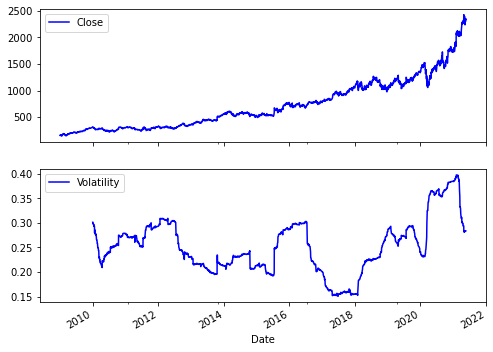

In [5]:
%matplotlib inline
goog[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))